In [1]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = ['DE_104_1_30_trimmed.mpt'])
bad_inds = [0,2,3]
mpt.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,380.53094,431.64484,575.43121,-48.601131,1.607490,-0.070666,-0.000031,0.000369,0.000207,1.0,12,0.000914,1.587914e-06,-2.271957e-08,-0.000058,0.001149,0.001304,0.001738,48.601131,-2.271957e-08,NaN,6.283302e+06
1,891246.69,399.59314,454.89511,605.47852,-48.702984,2.204497,-0.070132,-0.000025,0.000393,0.000222,1.0,12,0.001570,2.593358e-06,-2.124911e-08,0.000022,0.001090,0.001241,0.001652,48.702984,1.470459e-09,NaN,5.599868e+06
2,794332.69,428.44955,494.39752,654.21552,-49.087490,2.800481,-0.069679,-0.000019,0.000405,0.000231,1.0,12,0.001983,3.031703e-06,-3.798305e-08,-0.000299,0.001001,0.001155,0.001529,49.087490,-1.673393e-08,NaN,4.990939e+06
3,707949.81,458.40363,534.23718,703.94830,-49.368668,3.395492,-0.069249,-0.000016,0.000421,0.000242,1.0,12,0.001806,2.566079e-06,-7.746774e-08,-0.000299,0.000925,0.001078,0.001421,49.368668,-3.948469e-08,NaN,4.448180e+06
4,630956.81,489.62445,583.78113,761.92682,-50.013023,3.990478,-0.068865,-0.000030,0.000432,0.000254,1.0,12,0.000749,9.835666e-07,-6.853105e-08,0.000343,0.000843,0.001006,0.001312,50.013023,8.936687e-09,NaN,3.964419e+06


No handles with labels found to put in legend.


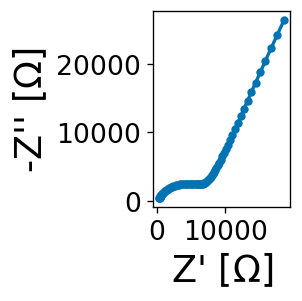

In [2]:
mpt.mpt_plot()

In [29]:
mpt.guesser()

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,DE_104_1_30_trimmed.mpt,239.505055,1398.063635,0.91046,95238.228566,3.933243e-09,5241.314751,0.766801,20831.759901,2.274630e-08,3.954920e-07,0.734353


In [25]:
mpt.low_error

172109.43593206568

No handles with labels found to put in legend.


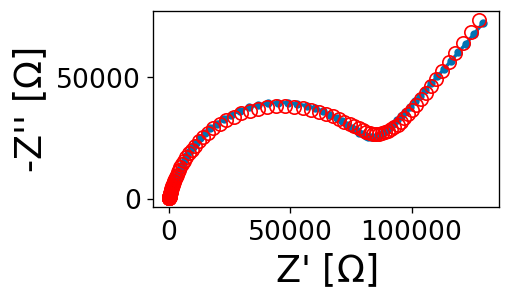

In [26]:
mpt.mpt_plot(fitting = 'on')

No handles with labels found to put in legend.


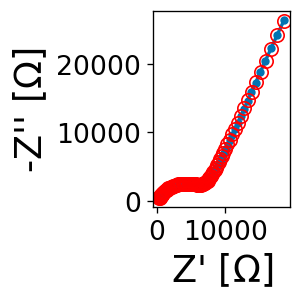

In [11]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = ['DE_104_1_30_trimmed.mpt'])




Rs_guess = min(mpt.df_raw['re'])
Q_guess = 10**-5
n_guess = .5

R1_guess = max(mpt.df_raw['re'])//2
n1_guess = .5
fs1_guess = 10**3

params = Parameters()
params.add('Rs', value=Rs_guess, min=0, max=Rs_guess*1000)

params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*100)
params.add('n', value=n_guess, min=.1, max=1)

params.add('R1', value=R1_guess, min=Rs_guess, max=R1_guess*100)
params.add('n1', value=n1_guess, min=.1, max=1)
params.add('fs1', value=fs1_guess, min=10**0, max=10**10)


(mpt.mpt_fit(params, circuit = 'R-RQ-Q'))

for i in range(5):
    Rs_guess = mpt.fit_Rs[0]

    Q_guess = mpt.fit_Q[0]
    n_guess =mpt.fit_n[0]
    R1_guess = mpt.fit_R1[0]
    n1_guess = mpt.fit_n1[0]
    fs1_guess = mpt.fit_fs1[0]

    params = Parameters()
    params.add('Rs', value=Rs_guess, min=0, max=Rs_guess*1000)

    params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*100)
    params.add('n', value=n_guess, min=.1, max=1)

    params.add('R1', value=R1_guess, min=Rs_guess, max=R1_guess*100)
    params.add('n1', value=n1_guess, min=.1, max=1)
    params.add('fs1', value=fs1_guess, min=10**0, max=10**10)

    #params['Q'].value
    mpt.mpt_fit(params=params, circuit='R-RQ-Q', weight_func='modulus')
mpt.mpt_plot(fitting = 'on')

[13.732506464461537]